In [1]:
import csv
import os
from itertools import groupby
import matplotlib.pyplot as plt
import numpy as np
import re


In [3]:
file_dir = os.getcwd()
dir_list = os.listdir(os.path.join(file_dir, "Randoop"))
files = []
for cur_file in dir_list:
    path = os.path.join(os.path.join(file_dir, "Randoop"),cur_file)
    if os.path.isdir(path) and path[0] != '.':
        files.append(cur_file)
print(files)

['Java-WebSocket', 'java-io-guide', 'reflections', 'JavaTutorial', '.ipynb_checkpoints', 'JavaVerbalExpressions', 'TheAlgorithms', 'tools']


In [14]:
files = ['Java-WebSocket', 'java-io-guide', 'reflections', 'JavaTutorial', 'JavaVerbalExpressions', 'TheAlgorithms', 'tools']

project: JavaTutorial
project: JavaTutorial


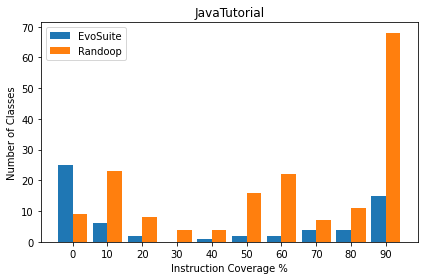

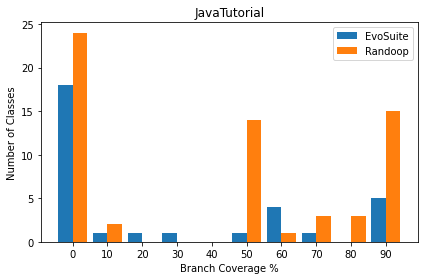

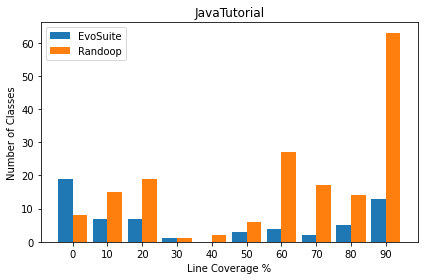

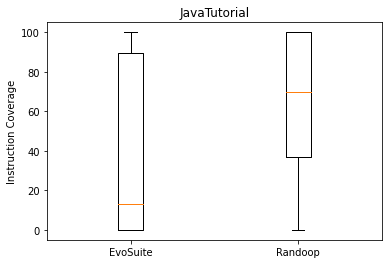

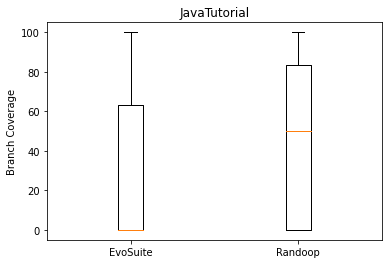

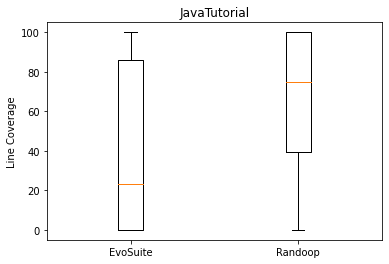

project: Java-WebSocket
project: Java-WebSocket


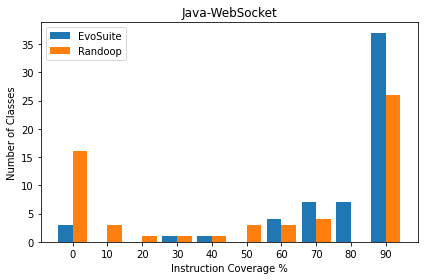

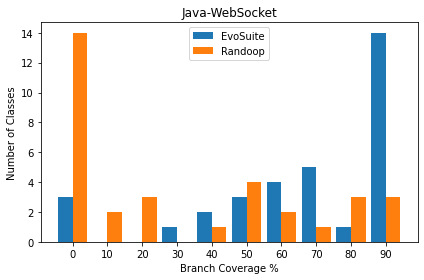

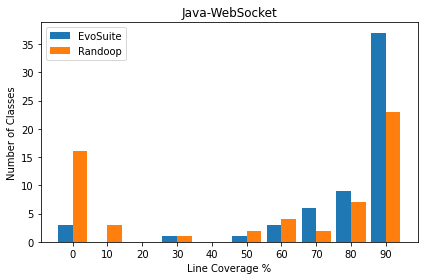

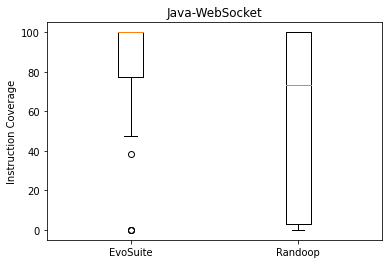

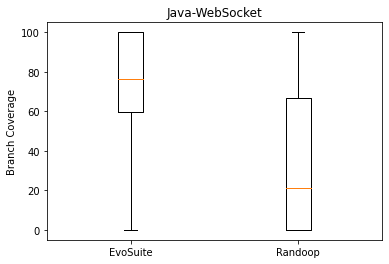

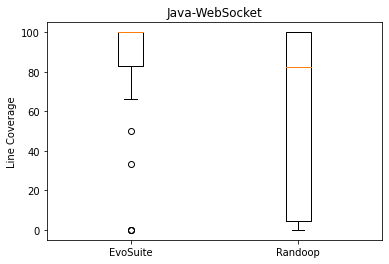

project: java-io-guide
project: java-io-guide


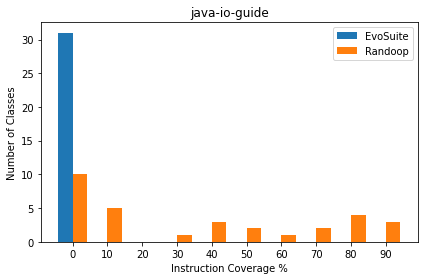

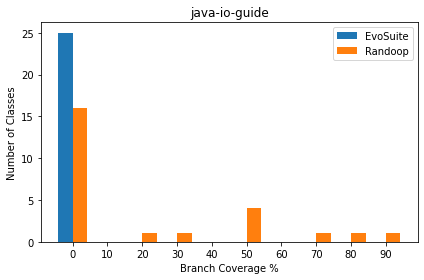

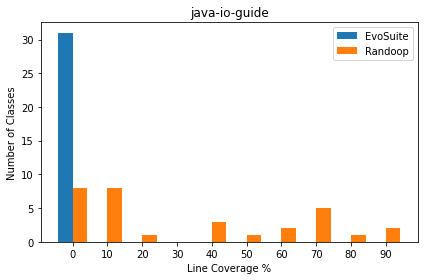

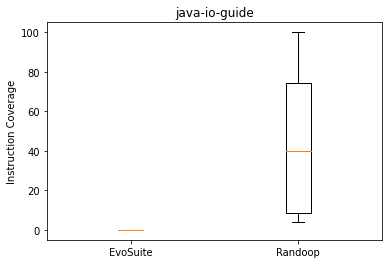

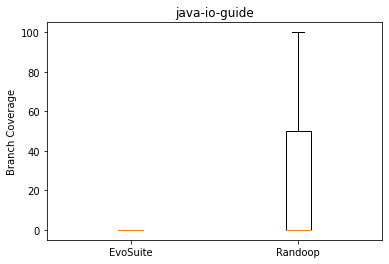

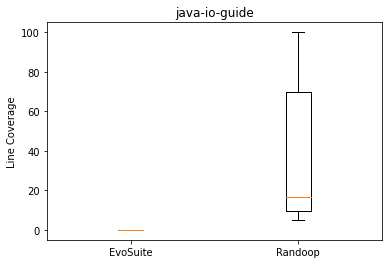

project: reflections
project: reflections


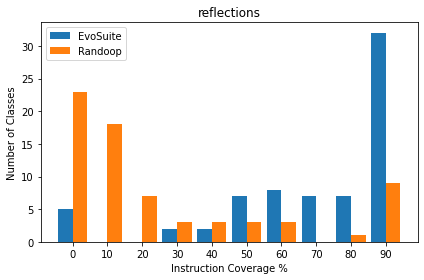

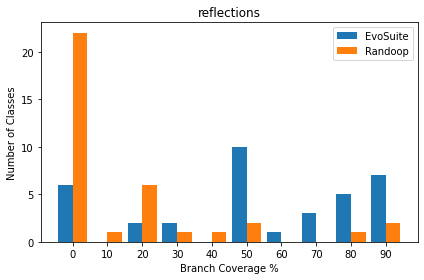

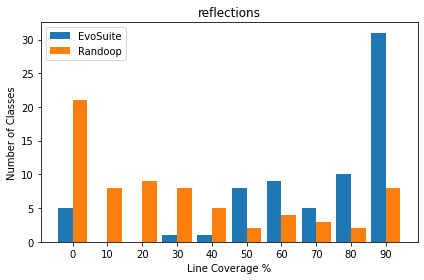

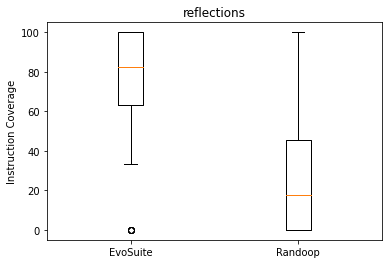

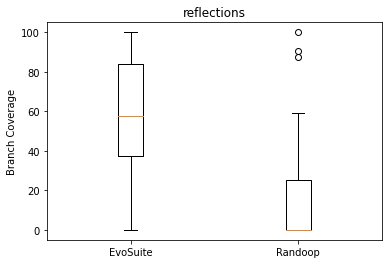

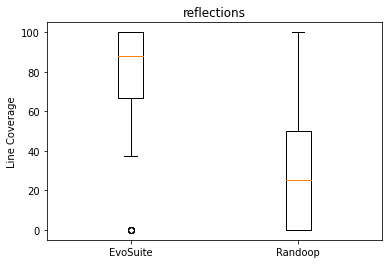

project: JavaVerbalExpressions
project: JavaVerbalExpressions


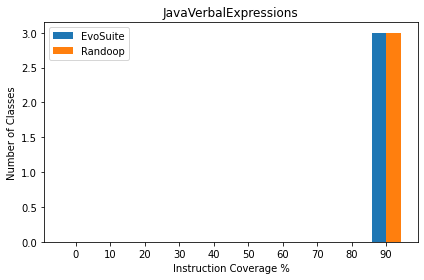

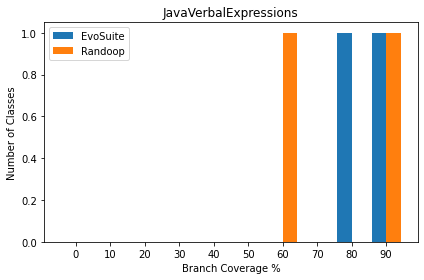

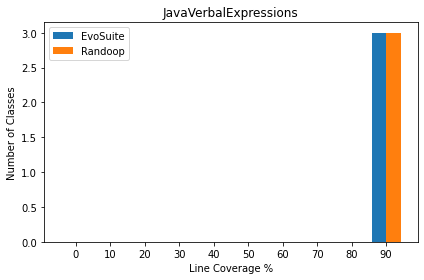

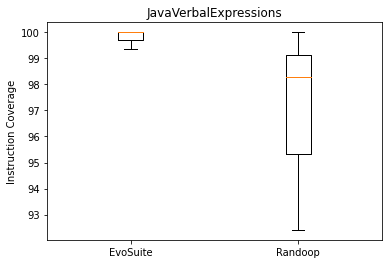

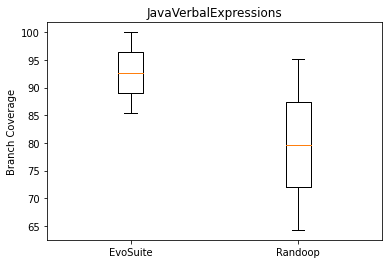

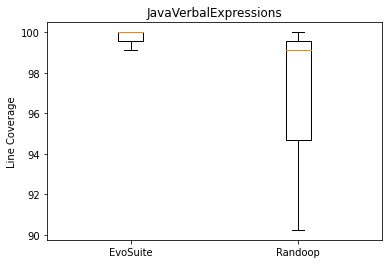

project: TheAlgorithms
project: TheAlgorithms


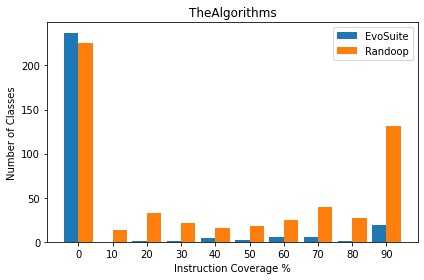

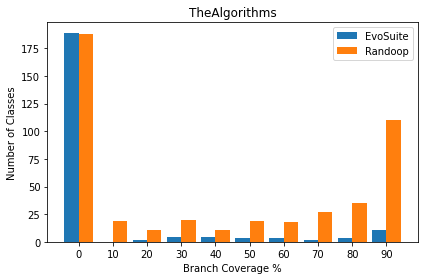

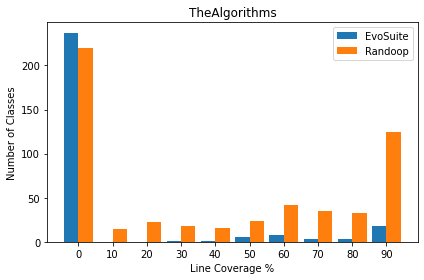

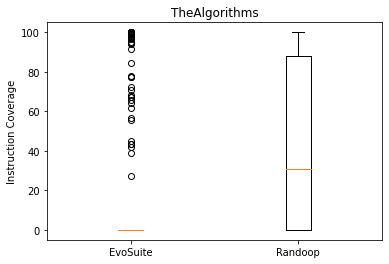

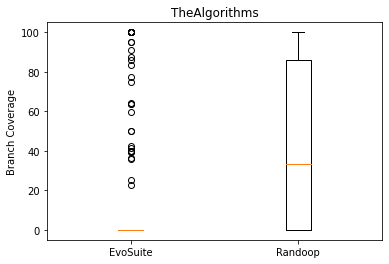

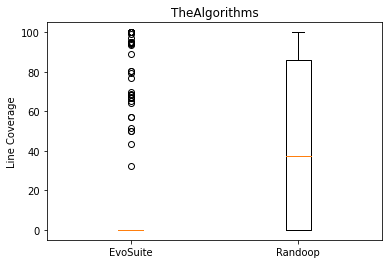

project: tools
project: tools


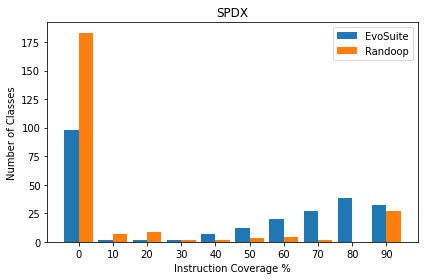

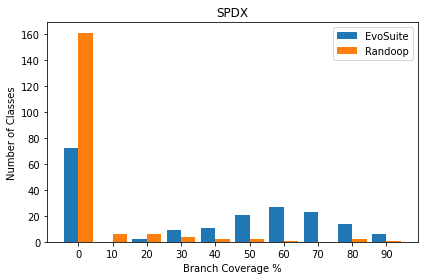

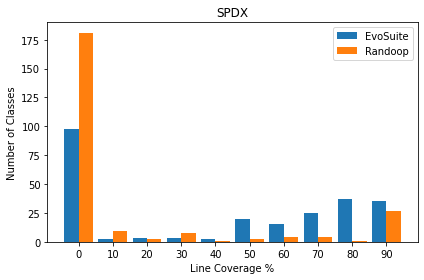

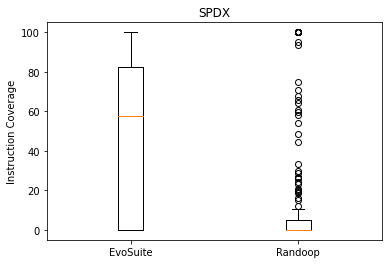

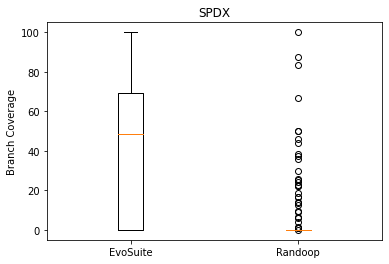

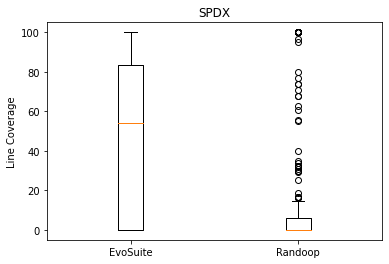

In [21]:
files = files = ['JavaTutorial', 'Java-WebSocket', 'java-io-guide', 'reflections', 'JavaVerbalExpressions', 'TheAlgorithms', 'tools']
for file in files:
    randoopPath = "/home/cxwang/JavaForGit/TestScripts/Randoop/" + file + "/jacoco.csv"
    evosuitePath = "/home/cxwang/JavaForGit/TestScripts/EvoSuite/"+ file + "/target/site/jacoco-ut/jacoco.csv"

    rinstruction = []
    rbranch = []
    rlin = []

    with open(randoopPath) as ranfile:
        reader = csv.reader(ranfile)
        result = list(reader)[1:]
        print("project: " + file)

        for line in result:
            INSTRUCTION_MISSED = int(line[3])
            INSTRUCTION_COVERED = int(line[4])
            instruction_coverage = 100.0 * INSTRUCTION_COVERED / (INSTRUCTION_MISSED + INSTRUCTION_COVERED)
            rinstruction.append(instruction_coverage)

            BRANCH_MISSED = int(line[5])
            BRANCH_COVERED = int(line[6])
            if BRANCH_MISSED + BRANCH_COVERED != 0:
                branch_coverage = 100.0 * BRANCH_COVERED / (BRANCH_MISSED + BRANCH_COVERED)
                rbranch.append(branch_coverage)

            LINE_MISSED = int(line[7])
            LINE_COVERED = int(line[8])
            if LINE_MISSED + LINE_COVERED != 0:
                line_coverage = 100.0 * LINE_COVERED / (LINE_MISSED + LINE_COVERED)
                rlin.append(line_coverage)
        
        
        step = 10

        rinsRes = [0] * 10
        for k, g in groupby(sorted(rinstruction), key=lambda x: x//step):
            # print('{}, {}'.format(k, len(list(g))))
            num = len(list(g))
            if k < 10:
                rinsRes[int(k)] += num
            else:
                rinsRes[9] += num

        rbranRes = [0] * 10
        for k, g in groupby(sorted(rbranch), key=lambda x: x//step):
            # print('{}, {}'.format(k, len(list(g))))
            num = len(list(g))
            if k < 10:
                rbranRes[int(k)] += num
            else:
                rbranRes[9] += num

        rlineRes = [0] * 10
        for k, g in groupby(sorted(rlin), key=lambda x: x//step):
            # print('{}, {}'.format(k, len(list(g))))
            num = len(list(g))
            if k < 10:
                rlineRes[int(k)] += num
            else:
                rlineRes[9] += num




        """
        print("current project randoop **********" + file)
        print("instruction_coverage: ")
        print(rinstruction)
        print("branch_coverage: ")
        print(rbranch)
        print("line_coverage: ")
        print(rlin)
        """
    einstruction = []
    ebranch = []
    elin = []

    with open(evosuitePath) as evofile:
        reader = csv.reader(evofile)
        result = list(reader)[1:]
        print("project: " + file)


        for line in result:
            INSTRUCTION_MISSED = int(line[3])
            INSTRUCTION_COVERED = int(line[4])
            instruction_coverage = 100.0 * INSTRUCTION_COVERED / (INSTRUCTION_MISSED + INSTRUCTION_COVERED)
            einstruction.append(instruction_coverage)

            BRANCH_MISSED = int(line[5])
            BRANCH_COVERED = int(line[6])
            if BRANCH_MISSED + BRANCH_COVERED != 0:
                branch_coverage = 100.0 * BRANCH_COVERED / (BRANCH_MISSED + BRANCH_COVERED)
                ebranch.append(branch_coverage)

            LINE_MISSED = int(line[7])
            LINE_COVERED = int(line[8])
            if LINE_MISSED + LINE_COVERED != 0:
                line_coverage = 100.0 * LINE_COVERED / (LINE_MISSED + LINE_COVERED)
                elin.append(line_coverage)

        
        step = 10

        einsRes = [0] * 10
        for k, g in groupby(sorted(einstruction), key=lambda x: x//step):
            # print('{}, {}'.format(k, len(list(g))))
            num = len(list(g))
            if k < 10:
                einsRes[int(k)] += num
            else:
                einsRes[9] += num

        ebranRes = [0] * 10
        for k, g in groupby(sorted(ebranch), key=lambda x: x//step):
            # print('{}, {}'.format(k, len(list(g))))
            num = len(list(g))
            if k < 10:
                ebranRes[int(k)] += num
            else:
                ebranRes[9] += num

        elineRes = [0] * 10
        for k, g in groupby(sorted(elin), key=lambda x: x//step):
            # print('{}, {}'.format(k, len(list(g))))
            num = len(list(g))
            if k < 10:
                elineRes[int(k)] += num
            else:
                elineRes[9] += num
        """
        print("current project evosuite **********" + file)
        print("instruction_coverage: ")
        print(einstruction)
        print("branch_coverage: ")
        print(ebranch)
        print("line_coverage: ")
        print(elin)
        """

    labels = list(map(str, range(0, 100, 10)))
    width = 0.42  # the width of the bars
    x = np.arange(len(labels))  
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, einsRes, width, label='EvoSuite')
    rects2 = ax.bar(x + width/2, rinsRes, width, label='Randoop')

    if file == 'tools':
        file = 'SPDX'

    ax.set_ylabel('Number of Classes')
    ax.set_xlabel('Instruction Coverage %')
    ax.set_title(file)# + ": Instruction Coverage Distribution")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.savefig('/home/cxwang/JavaForGit/TestScripts/images/' + file + "_Instruction_Coverage_Distribution.png", bbox_inches = 'tight')
    plt.show()

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, ebranRes, width, label='EvoSuite')
    rects2 = ax.bar(x + width/2, rbranRes, width, label='Randoop')

    ax.set_ylabel('Number of Classes')
    ax.set_xlabel('Branch Coverage %')
    ax.set_title(file)# + ": Branch Coverage Distribution")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.savefig('/home/cxwang/JavaForGit/TestScripts/images/' + file + "_Branch_Coverage_Distribution.png", bbox_inches = 'tight')
    plt.show()

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, elineRes, width, label='EvoSuite')
    rects2 = ax.bar(x + width/2, rlineRes, width, label='Randoop')

    ax.set_ylabel('Number of Classes')
    ax.set_xlabel('Line Coverage %')
    ax.set_title(file)# + ": Line Coverage Distribution")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.tight_layout()
    plt.savefig('/home/cxwang/JavaForGit/TestScripts/images/' + file + "_Line_Coverage_Distribution.png", bbox_inches = 'tight')
    plt.show()



    
    plt.boxplot([einstruction, rinstruction], labels=['EvoSuite', 'Randoop'])
    plt.title(file)# + ", " + "Instruction Coverage Distribution")
    plt.ylabel("Instruction Coverage")
    plt.savefig('/home/cxwang/JavaForGit/TestScripts/images/box_plot_' + file + "_Instruction_Coverage_Distribution.png", bbox_inches = 'tight')
    plt.show()

    plt.boxplot([ebranch, rbranch], labels=['EvoSuite', 'Randoop'])
    plt.title(file)# + ", " + "Branch Coverage Distribution")
    plt.ylabel("Branch Coverage")
    plt.savefig('/home/cxwang/JavaForGit/TestScripts/images/box_plot_' + file + "_branch_Coverage_Distribution.png", bbox_inches = 'tight')
    plt.show()

    plt.boxplot([elin, rlin], labels=['EvoSuite', 'Randoop'])
    plt.title(file)# + ", " + "Line Coverage Distribution")
    plt.ylabel("Line Coverage")
    plt.savefig('/home/cxwang/JavaForGit/TestScripts/images/box_plot_' + file + "_line_Coverage_Distribution.png", bbox_inches = 'tight')
    plt.show()

    


    

project: Java-WebSocket
[30, 31, 41, 42, 34, 122, 31, 30, 31, 30, 35, 30, 31, 30, 33, 34, 30, 33, 30, 31, 30, 18, 20, 20, 19, 19, 33, 31, 31, 34, 30, 33, 36, 34, 35, 34, 33, 34, 32, 31, 34, 35, 30, 34, 33, 30, 31, 30, 30, 31, 30, 37, 31, 33, 33, 33, 34, 30, 31, 33, 30, 31, 33, 31, 32, 30, 31]
[0, 3, 2, 59, 2, 0, 0, 0, 0, 1]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/Java-WebSocket/.evosuite/tmp_2022_11_11_23_02_55/reports
[14, 0, 0, 7, 5, 4, 1, 0, 0, 8]


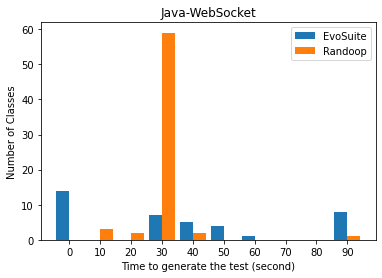

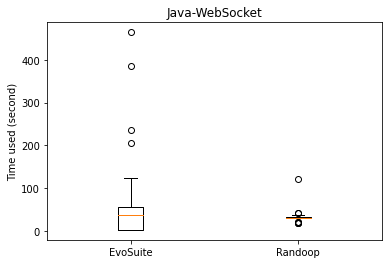

project: java-io-guide
[33, 32, 33, 31, 31, 32, 32, 30, 34, 31, 31, 30, 32, 30, 31, 34, 36, 34, 42, 32, 32, 32, 32, 33, 32, 31, 36, 33, 32, 31, 32]
[0, 0, 0, 30, 1, 0, 0, 0, 0, 0]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/java-io-guide/.evosuite/tmp_2022_11_26_20_25_27/reports
[5, 0, 0, 1, 3, 9, 2, 6, 1, 4]


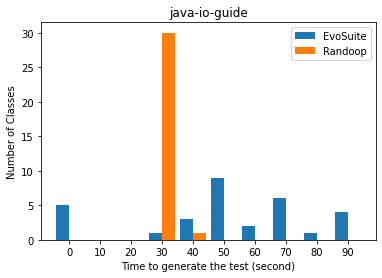

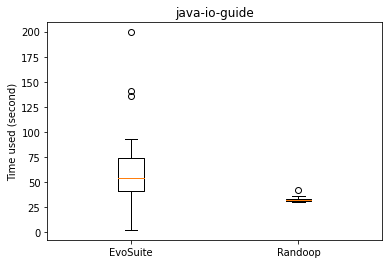

project: reflections
[33, 31, 33, 0, 34, 33, 34, 31, 0, 35, 35, 32, 28, 0, 34, 30, 0, 33, 42, 31, 31, 38, 31, 0, 30, 36, 34, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 30]
[18, 0, 1, 21, 1, 0, 0, 0, 0, 0]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/reflections/.evosuite/tmp_2022_11_11_23_52_59/reports
[7, 0, 0, 5, 6, 3, 3, 1, 1, 9]


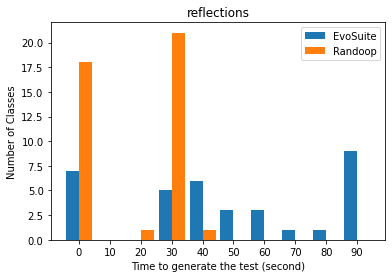

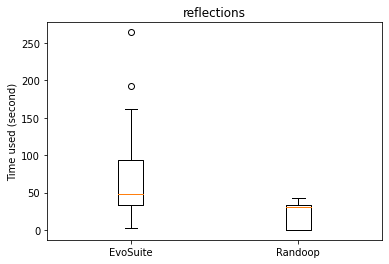

project: JavaTutorial
[32, 31, 32, 31, 31, 32, 32, 30, 31, 30, 32, 30, 31, 30, 31, 30, 31, 31, 30, 33, 31, 300, 31, 31, 31, 31, 31, 30, 44, 32, 31, 30, 49, 31, 31, 30, 31, 31, 31, 31, 49, 36, 30, 31, 31, 31, 31, 48, 31, 32, 30, 52, 32, 31, 31, 37, 32, 30, 31, 318, 32, 31, 33, 30, 31, 32, 31, 50, 32, 30, 31, 31, 30, 31, 31, 30, 31, 31, 30, 31, 31, 31, 30, 31, 30, 32, 30, 31, 30, 31, 30, 45, 30, 31, 32, 31, 30, 32, 30, 32, 32, 32, 31, 30, 47, 31, 31, 30, 63, 31, 33, 31, 31, 31, 61, 44, 32, 30, 44, 30, 31, 32, 49, 31, 30, 35, 34, 31, 31, 31, 31, 35, 44, 32, 1065, 31, 33, 30, 31, 31, 31, 30, 31, 30, 31, 31, 30, 31, 33, 32, 33, 31, 33, 31, 32, 34, 33, 32, 37, 32, 31, 31, 31, 33, 31]
[0, 0, 0, 148, 10, 2, 2, 0, 0, 3]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/JavaTutorial/.evosuite/tmp_2022_12_09_17_51_25/reports
[34, 0, 2, 36, 23, 12, 7, 4, 7, 24]


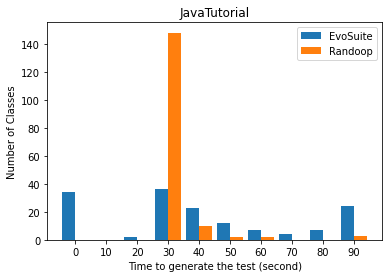

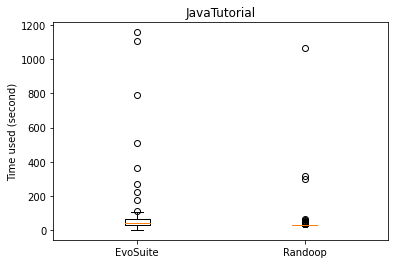

project: JavaVerbalExpressions
[33]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/JavaVerbalExpressions/.evosuite/tmp_2022_12_08_14_43_15/reports
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


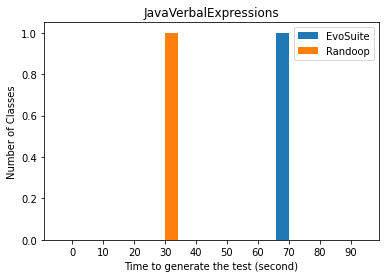

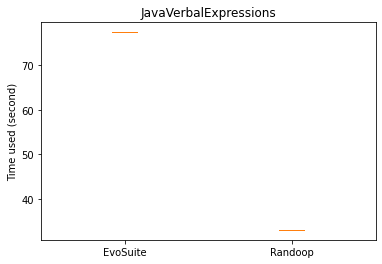

project: TheAlgorithms
[32, 32, 32, 32, 31, 31, 33, 32, 31, 33, 30, 32, 32, 31, 32, 31, 31, 30, 32, 33, 31, 32, 32, 31, 31, 30, 2, 31, 32, 31, 31, 30, 31, 30, 31, 32, 34, 33, 31, 31, 33, 30, 32, 30, 33, 30, 32, 33, 31, 32, 32, 31, 31, 32, 31, 33, 32, 34, 30, 32, 31, 33, 31, 31, 31, 35, 33, 33, 31, 38, 30, 33, 31, 31, 34, 32, 31, 31, 30, 31, 49, 32, 30, 34, 32, 30, 37, 31, 31, 30, 31, 34, 31, 31, 31, 30, 31, 32, 31, 31, 30, 32, 32, 32, 31, 32, 30, 33, 32, 31, 33, 30, 33, 33, 31, 30, 33, 30, 35, 33, 33, 34, 31, 31, 31, 31, 30, 33, 30, 32, 32, 30, 31, 33, 61, 36, 33, 32, 31, 30, 31, 32, 31, 36, 34, 74, 31, 35, 31, 31, 44, 32, 31, 33, 33, 31, 33, 33, 31, 31, 34, 34, 31, 31, 30, 31, 32, 30, 33, 31, 31, 32, 31, 34, 37, 32, 31, 34, 32, 30, 31, 31, 31, 33, 31, 33, 30, 32, 33, 31, 30, 31, 35, 32, 32, 30, 32, 30, 31, 31, 31, 30, 33, 31, 30, 31, 31, 30, 32, 31, 30, 34, 31, 30, 32, 31, 31, 33, 30, 31, 33, 33, 33, 31, 31, 32, 31, 33, 31, 33, 31, 31, 34, 30, 34, 31, 31, 30, 31, 33, 33, 31, 30, 32, 3

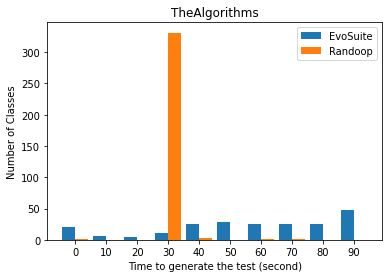

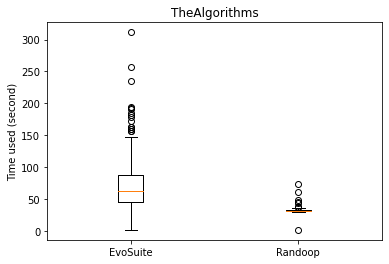

project: tools
[0, 31, 31, 31, 31, 0, 31, 30, 31, 0, 31, 30, 31, 0, 0, 31, 0, 30, 31, 32, 31, 31, 31, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 32, 1, 0, 1, 0, 0, 1, 0, 32, 0, 32, 32, 311, 33, 179, 31, 0, 30, 1, 31, 0, 1, 32, 30, 1, 31, 32, 32, 32, 1, 0, 30, 32, 0, 0, 0, 1, 31, 0, 0, 31, 0, 1, 0, 30, 31, 30, 1, 0, 0, 0, 0, 1, 32, 35, 31, 33, 33, 0, 0, 1, 0, 0, 0, 0, 917, 0, 0, 32, 34, 0, 0, 0, 33, 0, 30, 1, 30, 0, 0, 1, 0, 31, 0, 31, 0, 0, 31, 32, 0, 32, 32, 32, 1, 31, 1, 32, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 1, 32, 31, 0, 32, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 30, 32, 0, 0, 1, 22, 31, 32, 0, 32, 1, 0, 37, 31, 33, 31, 32, 30, 34, 32]
[131, 0, 1, 73, 0, 0, 0, 0, 0, 3]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/tools/.evosuite/tmp_2022_11_12_00_37_31/reports
[13, 12, 1, 9, 30, 27, 20, 14, 12, 58]


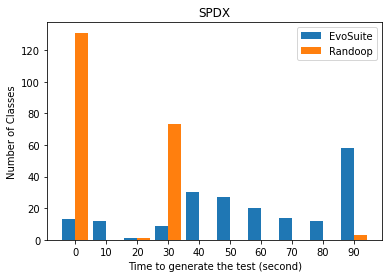

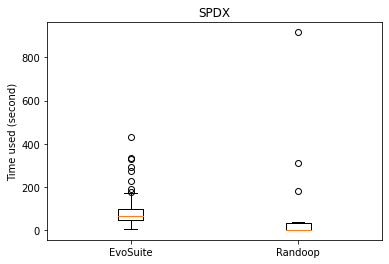

In [22]:
files = files = ['Java-WebSocket', 'java-io-guide', 'reflections', 'JavaTutorial', 'JavaVerbalExpressions', 'TheAlgorithms', 'tools']
for file in files:
    randoopPath = "/home/cxwang/JavaForGit/TestScripts/Randoop/" + file + "/time.csv"

    rtimes = []
    etimes = []

    with open(randoopPath) as ranfile:
        reader = csv.reader(ranfile)
        result = list(reader)
        print("project: " + file)

        pre_time = 0

        for line in result:
            cur_time = int(line[1])
            rtimes.append(cur_time - pre_time)
            pre_time = cur_time

        step = 10
        print(rtimes)
        rTimesRes = [0] * 10
        for k, g in groupby(sorted(rtimes), key=lambda x: x//step):
            # print('{}, {}'.format(k, len(list(g))))
            num = len(list(g))
            if k < 10:
                rTimesRes[int(k)] += num
            else:
                rTimesRes[9] += num
        print(rTimesRes)

    eTimesRes = [0] * 10
    path = "/home/cxwang/JavaForGit/TestScripts/EvoSuite/" + file
    for f in os.listdir(path + '/.evosuite'):
        if re.match(r'tmp_2022*', f):
            npath = path + '/.evosuite/' + f + '/reports'
            print(npath)
            for p in os.listdir(npath):
                file_path = npath + '/' + p + '/statistics.csv'
                with open(file_path) as efile:
                    reader = csv.reader(efile)
                    result = list(reader)[1:]
                    for line in result:
                        time = int(line[10]) / 1000
                        etimes.append(time)
                        index = int(time / 10)
                        if index < 9:
                            eTimesRes[index] = eTimesRes[index] + 1
                        else:
                            eTimesRes[9] = eTimesRes[9] + 1
    print(eTimesRes)

    labels = list(map(str, range(0, 100, 10)))
    width = 0.42  # the width of the bars
    x = np.arange(len(labels))  
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, eTimesRes, width, label='EvoSuite')
    rects2 = ax.bar(x + width/2, rTimesRes, width, label='Randoop')

    if file == 'tools':
        file = 'SPDX'
        
    ax.set_ylabel('Number of Classes')
    ax.set_xlabel('Time to generate the test (second)')
    ax.set_title(file)# + ": Time Distribution")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()



    
    plt.boxplot([etimes, rtimes], labels=['EvoSuite', 'Randoop'])
    plt.ylabel("Time used (second)")
    plt.title(file)# + ", " + "Time Distribution")
    plt.show()
    


    

[21, 0, 0, 0, 0, 0, 0, 0, 0, 30]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/Java-WebSocket/.evosuite/tmp_2022_11_11_23_02_55/reports
[28, 5, 2, 2, 0, 0, 1, 1, 0, 0]


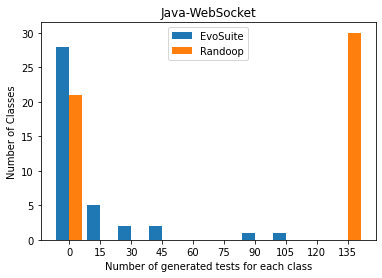

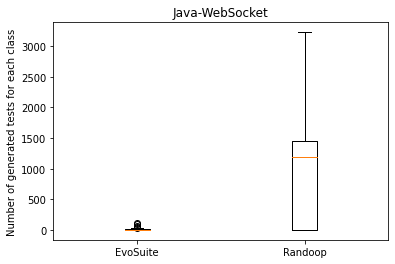

[25, 0, 0, 0, 0, 1, 0, 0, 0, 5]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/java-io-guide/.evosuite/tmp_2022_11_26_20_25_27/reports
[30, 1, 0, 0, 0, 0, 0, 0, 0, 0]


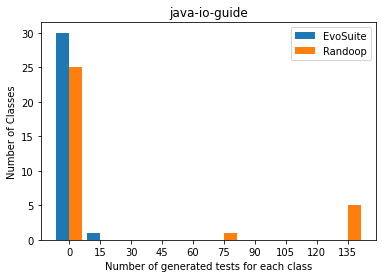

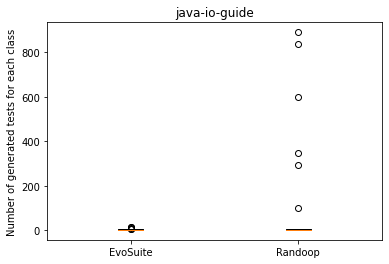

[6, 0, 0, 0, 0, 0, 0, 0, 0, 15]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/reflections/.evosuite/tmp_2022_11_11_23_52_59/reports
[22, 6, 4, 1, 1, 0, 1, 0, 0, 0]


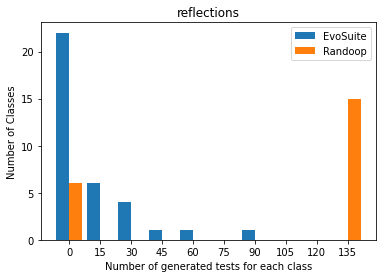

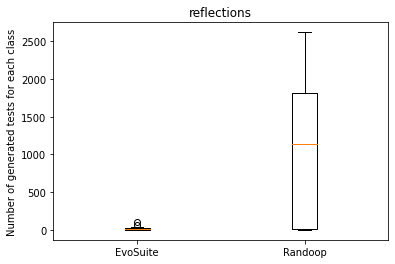

[95, 4, 6, 2, 2, 16, 4, 1, 0, 29]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/JavaTutorial/.evosuite/tmp_2022_12_09_17_51_25/reports
[140, 5, 2, 1, 1, 0, 0, 0, 0, 0]


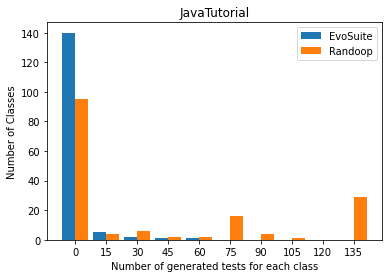

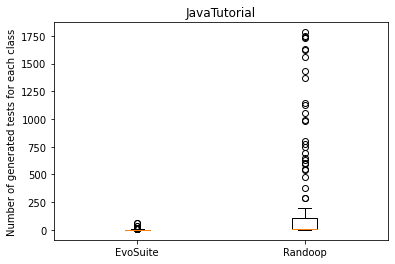

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/JavaVerbalExpressions/.evosuite/tmp_2022_12_08_14_43_15/reports
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


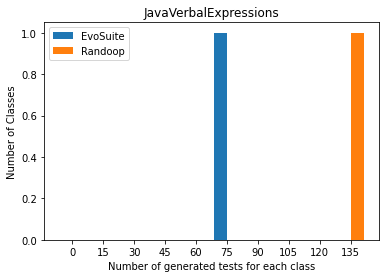

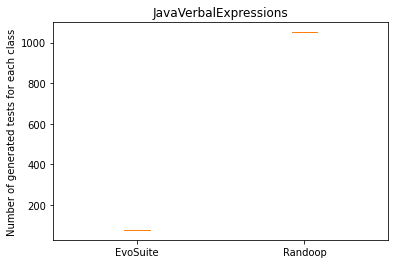

[77, 36, 7, 13, 4, 20, 5, 2, 5, 163]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/TheAlgorithms/.evosuite/tmp_2022_10_14_22_08_04/reports
[161, 47, 9, 1, 1, 0, 0, 0, 0, 0]


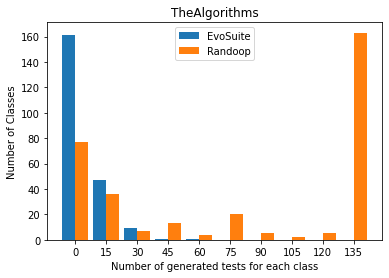

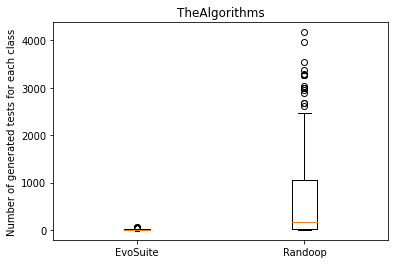

[19, 1, 3, 2, 0, 1, 3, 2, 1, 41]
/home/cxwang/JavaForGit/TestScripts/EvoSuite/tools/.evosuite/tmp_2022_11_12_00_37_31/reports
[102, 49, 23, 9, 10, 1, 1, 1, 0, 0]


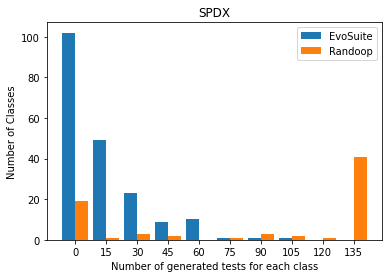

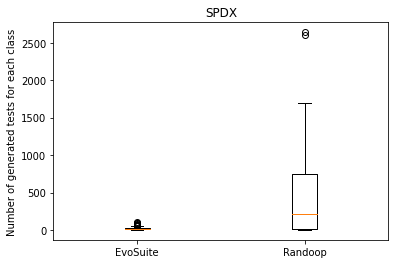

In [23]:
files = files = ['Java-WebSocket', 'java-io-guide', 'reflections', 'JavaTutorial', 'JavaVerbalExpressions', 'TheAlgorithms', 'tools']
for file in files:
    randoopPath = "/home/cxwang/JavaForGit/TestScripts/Randoop/" + file + "/process.txt"

    rcounts = []
    ecounts = []

    with open(randoopPath) as ranfile:
        lines = ranfile.readlines()
        for line in lines:
            if len(line) > 23 and line[:23] == "Regression test count: ":
                count = line[23:(len(line) - 1)]
                rcounts.append(int(count)) 

        step = 20

        rCountRes = [0] * 10
        for k, g in groupby(sorted(rcounts), key=lambda x: x//step):
            # print('{}, {}'.format(k, len(list(g))))
            num = len(list(g))
            if k < 10:
                rCountRes[int(k)] += num
            else:
                rCountRes[9] += num
        print(rCountRes)

    eCountRes = [0] * 10
    path = "/home/cxwang/JavaForGit/TestScripts/EvoSuite/" + file
    for f in os.listdir(path + '/.evosuite'):
        if re.match(r'tmp_2022*', f):
            npath = path + '/.evosuite/' + f + '/reports'
            print(npath)
            for p in os.listdir(npath):
                file_path = npath + '/' + p + '/statistics.csv'
                with open(file_path) as efile:
                    reader = csv.reader(efile)
                    result = list(reader)[1:]
                    for line in result:
                        size = int(line[8])
                        ecounts.append(size)
                        index = int(size / 15)
                        if index < 9:
                            eCountRes[index] = eCountRes[index] + 1
                        else:
                            eCountRes[9] = eCountRes[9] + 1
    print(eCountRes)

    labels = list(map(str, range(0, 150, 15)))
    width = 0.42  # the width of the bars
    x = np.arange(len(labels))  
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, eCountRes, width, label='EvoSuite')
    rects2 = ax.bar(x + width/2, rCountRes, width, label='Randoop')

    if file == 'tools':
        file = 'SPDX'

    ax.set_ylabel('Number of Classes')
    ax.set_xlabel('Number of generated tests for each class')
    ax.set_title(file)# + ": Number of Generated Tests Distribution")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()



    
    plt.boxplot([ecounts, rcounts], labels=['EvoSuite', 'Randoop'])
    plt.ylabel("Number of generated tests for each class")
    plt.title(file)# + ", " + "Number of Generated Tests Distribution")
    plt.show()
    


    